# 20 - Plug-and-Play Estimators
 
지금까지 처치가 무작위로 할당되지 않아 발생한 교란 편향(confounding bias)을 제거하는 방법을 살펴봤습니다. 여러 방법을 통해 인과추론에서 식별 문제를 해결할 수 있습니다. 피처치자를 서로 바꿔도 문제가 없는 경우, 즉 $ Y(0), Y(1) \perp X$인 경우에는 처치 효과를 학습할 수 있습니다. 하지만 이것이 끝이 아닙니다. 
 
식별은 평균 처치 효과(ATE)를 찾을 수 있다는 것을 의미합니다. 쉽게 말하자면 처치를 하는 것이 평균적으로 얼마만큼의 효과를 가져오는지 알 수 있다는 뜻입니다. 그리고 이 정보는 처치를 시행할지 말지 결정하는 데 도움을 줄 수 있습니다. 하지만 이 정도로 충분하지 않을 수도 있습니다. 처치에 더 잘 반응하거나 덜 반응하는 그룹이 있는지 알고 싶을 수도 있죠. 이 정보를 이용하면 더 나은 계획을 세울 수 있습니다. 처치에 잘 반응하는 사람들에게만 처치를 하면 되니까요.
 
 
## Problem Setup
 
우리가 알고 싶은 게 뭔지 되짚어볼까요? 잠재적 결과가 주어졌을 때, 개별 처치 효과(ITE)는 잠재적 결과 사이의 차이입니다.
 
$
\tau_i = Y_i(1) − Y_i(0),
$

처치가 연속적인 경우라면 처치변수가 $t$일 때 $\tau_i = \partial Y(t)$이겠죠. 하지만 우리는 개별 처치 효과를 관측할 수 없습니다. 우리는 잠재적 결과 중 하나만 확인할 수 있으니까요.
 
$
Y^{obs}_i(t)= 
\begin{cases}
Y_i(1), & \text{if } t=1\\
Y_i(0), & \text{if } t=0
\end{cases}
$
 
대신 평균 처치 효과를 아래와 같이 정의할 수 있습니다.
 
$
\tau = E[Y_i(1) − Y_i(0)] = E[\tau_i]
$
 
조건부 평균 처치 효과(CATE)는 다음과 같죠.
 
$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$
 
이 책의 파트 I에서는 주로 ATE에 초점을 맞췄습니다. 이제 CATE에 집중해볼 겁니다. CATE는 개인에 맞춘 의사 결정 과정을 만드는 데 유용합니다. 예를 들어, 어떤 약물을 처치 $t$로 사용하는 경우, 어떤 환자가 약물에 더 잘 반응하는지(CATE 높음), 약물로 역효과가 나는 환자(CATE <0)는 없는지 알고 싶겠죠. 

앞에서는 처치와 피처 간의 상호작용을 포함시킨 선형 회귀를 이용해 CATE를 구했습니다.
 
$
y_i = \beta_0 + \beta_1 t_i + \beta_2 X_i + \beta_3 t_i X_i + e_i.
$
 
이 모델을 추정하면, $\tau(x)$의 추정치를 얻을 수 있습니다.
 
$
\hat{\tau}(x) = \hat{\beta}_1 + \hat{\beta}_3 X_i
$

하지만 선형 모델에는 몇 가지 문제가 있습니다. 가장 큰 한계는 $X$에 대한 선형성 가정입니다. 이 모델에서는 $\beta_2$에 대해 신경을 쓰지 않습니다. 하지만 피처 $X$가 결과와 선형 관계에 있지 않다면, 인과 매개 변수 $\beta_1$와 $\beta_3$의 추정치가 잘못될 것입니다. 
 
선형 모델 대신 더 유연한 머신러닝 모델을 쓸 수 있다면 좋겠죠? 부스트 트리나 신경망 같은 ML 모델에 처치를 피처로 넣어줄 수도 있습니다.
 
$
y_i = M(X_i, T_i) + e_i
$
 
하지만 이렇게 봤을 때는 처치 효과를 어떻게 계산해야 할지 감이 안 잡힙니다. 이 모델은 $\hat{\tau(x)}$이 아니라 $\hat{y}$를 예측하니까요. 우리가 원하는 ML 회귀 모델은 아래처럼 결과의 MSE를 최소화하는 것이 아니라
 
$
E[(Y_i - \hat{Y}_i)^2]
$
 
이렇게 처치 효과의 MSE를 최소화해야 합니다.
 
$
E[(\tau(x)_i - \hat{\tau}(x)_i)^2] = E[(Y_i(1) - Y_i(0) - \hat{\tau}(x)_i)^2].
$

그러나 이 기준은 실현 불가능합니다. 매번 말하지만, 우리는 $\tau(x)_i$를 관측할 수 없기 때문에 여기에 직접적으로 최적화할 수도 없습니다. 이거 곤란하네요... 식을 조금 더 단순하게 정리해볼까요? 뭔가 떠오를 수도 있습니다.


![img](./data/img/plug-and-play-estimators/infeasible.png)

## Target Transformation

우리 시나리오에서 처치가 0 또는 1로 주어진다고 생각해봅시다. 여러분이 투자 회사에 다니는데, 금융 교육 이메일을 발송했을 때의 효과를 알고 싶다고 해보죠. 이메일을 보냈을 때 더 많은 사람들이 투자를 하기를 기대할 겁니다. 그리고 무작위 연구를 시행한다고 가정합시다. 고객의 50%는 이메일을 수신하고 나머지 50%는 수신하지 않습니다. 
 
천재적인 아이디어를 하나 내보겠습니다. 결과 변수에 처치를 곱하여 결과 변수를 변형하는 겁니다.
 
$
Y^*_i = 2 Y_i * T_i - 2 Y_i*(1-T_i)
$
 
처치를 받은 경우에는 결과 변수에 2를 곱합니다. 처치를 받지 않은 경우에는 결과에 -2가 곱해지겠죠. 예를 들어, 어떤 고객이 이메일을 받고 2000 헤알(브라질 화폐 단위)을 투자했다면 타겟을 4000으로 변환합니다. 그러나 이메일을 받지 못했다면 -4000이 되겠죠. 
 
조금 이상하죠? 이메일의 효과가 음수일 수도 있다뇨. 하지만 조금만 두고 보세요. 약간의 수학적 계산을 거치면, 이 변형된 목표가 처치 효과의 평균값 또는 기대값이 됩니다. 정말 놀라운 결과입니다. 이 엉뚱한 변환을 거치면, 우리가 관찰할 수 없는 것을 추정할 수 있습니다. 
 
이를 받아들이기 위해서는 약간의 수학이 필요합니다. 무작위 할당을 했으니 $T \perp Y(0), Y(1)$입니다. 교란 변수가 없다는 뜻이죠. 이 경우 독립성의 정의에 따라 $E[T, Y(t)]=E[T]*E[Y(t)]$입니다

위 사실들로부터 다음 식이 도출됩니다.

$
Y_i*T_i = Y(1)_i*T_i \text{ and }  Y_i*(1-T_i) = Y(0)_i*T_i
$

처치를 받으면 잠재적 결과 중 하나가 실현되니까요. 이를 염두에 두고, $Y^*_i$의 기대값이 어떻게 나오는지 살펴봅시다. 
 
$
\begin{align}
E[Y^*_i|X_i=x] &= E[2 Y(1)_i * T_i - 2 Y(0)_i*(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i * T_i | X_i=x] - 2E[Y(0)_i*(1-T_i)|X_i=x]\\
&= 2E[Y(1)_i| X_i=x] * E[ T_i | X_i=x] - 2E[Y(0)_i| X_i=x]*E[(1-T_i)|X_i=x] \\
&= 2E[Y(1)_i| X_i=x] * 0.5 - 2E[Y(0)_i| X_i=x]*0.5 \\ 
&= E[Y(1)_i| X_i=x] - E[Y(0)_i| X_i=x] \\
&= \tau(x)_i
\end{align}
$

이 천재적인 아이디어를 따라가다보니 개별 치료 효과 $\tau(x)_i$의 편향되지 않은 추정치가 나왔습니다. 이제, 앞에서는 실행 불가능한 최적화 기준을 이렇게 바꿔봅시다. 
 
$
E[(Y^*_i - \hat{\tau}(x)_i)^2]
$
 
쉽게 말해서, 회귀 머신러닝 모델을 사용하여 $Y^*_i$를 예측하기만 하면 됩니다. 그럼 그 모델이 처치 효과를 예측합니다. 
 
지금까지 간단한 경우를 살펴봤습니다. 이제 더 복잡한 경우를 생각해봅시다. 처치가 50 대 50으로 주어지지 않거나, 아예 무작위 할당이 아니라면 어떨까요? 조금 더 복잡한 과정이 필요하지만 그렇게 어렵지는 않습니다. 먼저, 무작위 할당이 아닌 경우라면 최소한 조건부 독립성 $T \perp Y(1), Y(0) | X$가 필요합니다. $X$만 통제하면 $T$는 무작위인 경우죠. 이 경우에는 타겟 변환을 아래와 같이 일반화 할 수 있습니다.
 
$
Y^*_i = Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}
$

여기서 $e(X_i)$는 경향 점수(propensity score)입니다. 처치가 50 대 50이 아니라 다른 확률 $p$로 무작위 할당된 경우, 위의 공식에서 경향 점수를 $p$로 바꾸기만 하면 됩니다. 무작위 처치가 아니라면 미리 구했거나 추정한 성향 점수를 사용해야 합니다. 
 
이 값의 기대값을 계산하면 처치 효과와 일치한다는 것을 알 수 있습니다. 증명은 여러분게 맡길게요! 농담이에요. 여기 있습니다. 조금 번거롭기 때문에 건너뛰셔도 됩니다. 
 
$
\begin{align}
E[Y^*_i|X_i=x] &= E\big[Y_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big] \\
&= E\big[Y_i T_i * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))} + Y_i (1-T_i) * \dfrac{T_i - e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= E\big[Y(1)_i * \dfrac{T_i(1 - e(X_i))}{e(X_i)(1-e(X_i))} | X_i=x\big] - E\big[Y(0)_i * \dfrac{(1-T_i)e(X_i)}{e(X_i)(1-e(X_i))}|X_i=x\big]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i * T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i * (1-T_i)| X_i=x]\\
&= \dfrac{1}{e(X_i)} E[Y(1)_i|X_i=x] * E[T_i|X_i=x] - \dfrac{1}{1-e(X_i)} E[Y(0)_i|X_i=x] * E[(1-T_i)| X_i=x]\\
&= E[Y(1)_i|X_i=x] - E[Y(0)_i|X_i=x]\\
&= \tau(x)_i
\end{align}
$

언제나 그렇듯, 사례를 보면 더 잘 와닿을 겁니다. 사람들의 투자를 유도하기 위해 보냈던 메일을 다시 살펴봅시다. 결과 변수는 `converted`로 이진 변수입니다. (투자를 했느냐 vs 안 했느냐)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from nb21 import cumulative_gain, elast

In [2]:
email = pd.read_csv("./data/invest_email_rnd.csv")
email.head()

age   income  insurance  invested  em1  em2  em3  converted
0  44.1  5483.80    6155.29  14294.81    0    1    1          0
1  39.8  2737.92   50069.40   7468.15    1    0    0          0
2  49.0  2712.51    5707.08   5095.65    1    0    1          1
3  39.7  2326.37   15657.97   6345.20    1    1    1          0
4  35.3  2787.26   27074.44  14114.86    1    1    1          0

우리의 목표는 개인화입니다. ```em1```에 집중해봅시다. 우리는 이 이메일에 더 잘 반응할 고객에게만 메일을 보내고 싶습니다. 다른 말로 표현하자면, ```em1```의 조건부 평균 처치 효과를 추정하려고 합니다. 그래야 메일에 잘 반응하는 (CATE가 높은) 고객들을 타겟팅할 수 있으니까요.
 
$
E[Converted(1)_i - Converted(0)_i|X_i=x] = \tau(x)_i
$

하지만 그 전에, 우리의 데이터셋을 Training set과 Validation set으로 나눕시다. Training set에서 $\tau(x)_i$를 추정하고 Validation set에서 그 추정치를 평가할 겁니다.

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
train, test = train_test_split(email, test_size=0.4)
print(train.shape, test.shape)

(9000, 8) (6000, 8)


이제 방금 배운 타겟 변환을 적용해봅시다. 50 대 50은 아니지만, 이메일이 무작위로 할당되었으므로 경향 점수를 걱정할 필요가 없습니다. 경향 점수는 처치 확률로 일정합니다.

In [4]:
y = "converted"
T = "em1"
X = ["age", "income", "insurance", "invested"]

ps = train[T].mean()

y_star_train = train[y] * (train[T] - ps)/(ps*(1-ps))

타켓 변환을 거친 후에는 원하는 ML 회귀 알고리즘을 써서 예측값을 계산하면 됩니다. 여기서는 부스트 트리를 사용하겠습니다.

In [5]:
from lightgbm import LGBMRegressor

np.random.seed(123)
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)
cate_learner.fit(train[X], y_star_train);

이제 이 모델은 $\tau(x)_i$를 추정할 수 있습니다. 다르게 말하자면, 이 모델의 출력값은 $\hat{\tau}(x)_i$입니다. 예를 들어, test set에 대한 예측을 수행한다고 합시다. 어떤 사람들은 다른 사람들보다 CATE가 높을 것입니다. 예를 들어 고객 6958의 CATE는 0.1로, 이 고객에게 이메일을 보내면 투자 상품을 구매할 확률이 0.1 증가할 것으로 예측됩니다. 반면, 고객 3903의 경우 상품 구매 확률은 0.04만큼만 증가합니다.

In [6]:
test_pred = test.assign(cate=cate_learner.predict(test[X]))
test_pred.head()

age   income  insurance  invested  em1  em2  em3  converted      cate
6958  40.9  4486.14   37320.33  12559.25    0    0    1          0  0.105665
7534  42.6  6386.19   13270.47  29114.42    0    0    1          0  0.121922
2975  47.6  1900.26   25588.72   2420.39    0    0    1          0  0.034161
3903  41.0  5802.19   57087.37  20182.20    1    0    1          1  0.046805
8437  49.1  2202.96    5050.81   9245.88    1    0    1          0 -0.009099

이 모델의 성능을 평가하고 싶다면 각 데이터셋에 대해 누적 증가 곡선(cumulative gain curve)을 그려보면 됩니다.

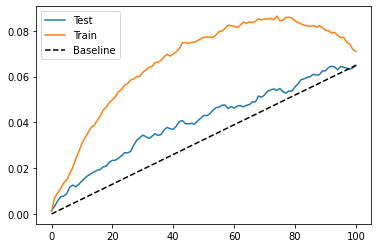

In [7]:
gain_curve_test = cumulative_gain(test_pred, "cate", y="converted", t="em1")
gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[X])), "cate", y="converted", t="em1")
plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test, "converted", "em1")], linestyle="--", color="black", label="Baseline")
plt.legend();

보시다시피, 이 플러그 앤 플레이 추정기를 test set에서 시험해봤을 때 베이스라인(무작위)보다는 나은 결과를 보입니다. 하지만 training set의 성능이 test set의 성능보다 훨씬 우수한 것으로 보아, 오버피팅이 많이 발생하는 것 같네요.
 
이것이 타겟 변환 기법의 가장 큰 단점 중 하나입니다. 타겟 변환을 사용하면 일이 아주 간단해집니다. 타겟을 변환하고 아무 ML 추정기를 사용하여 처치 효과를 예측할 수 있으니까요. 그 대신 분산이 굉장히 커집니다. 변환된 타겟은 개별 처치 효과를 계산하기엔 노이즈가 굉장히 많은(noisy)한 추정치입니다. 그 분산은 추정치로 전달되죠. 데이터가 많지 않은 경우 이는 큰 문제입니다. 하지만 1MM 이상의 샘플을 다루는 빅데이터 사례에서는 문제가 덜할 수 있습니다.

## The Continuous Treatment Case

![img](./data/img/plug-and-play-estimators/second-estimator.png)

타켓 변환 방법의 단점 하나는 이산적인 처치 또는 이진 처치에서만 쓸 수 있다는 것입니다. 인과추론 논문에서는 많이 볼 수 있는 케이스입니다. 대부분의 연구는 이진 처치를 다루고, 연속적인 처리에 대한 연구는 많지 않죠. 그 때문에 골치를 꽤나 썩혔습니다. 산업계에서는 주로 최적화할 가격처럼 연속적인 처치를 많이 사용하니까요. 그래서 연속적인 처치에 대한 타겟 변환에 관한 연구는 찾을 수 없었지만, 실제 상황에서 써볼만한 방법을 생각해냈습니다. 단, 이 부분에 대해서는 확실한 계량경제학적 연구가 없다는 점을 염두에 두시기 바랍니다.
 
동기를 부여하기 위해 아이스크림 판매 사례로 돌아가 보겠습니다. 우리는 수익을 최적화하는 아이스크림 가격을 정할 수 있도록, 가격에 대한 수요 탄력성을 추정해야 했습니다. 데이터셋의 한 샘플은 하루 단위이며, 우리는 사람들이 가격 인상에 덜 민감한 시기를 알고 싶습니다. 또한 이 데이터셋에서는 가격이 무작위로 할당되었기 때문에 교랸 편향에 대해 걱정할 필요가 없습니다.

In [8]:
prices_rnd = pd.read_csv("./data/ice_cream_sales_rnd.csv")
prices_rnd.head()

temp  weekday  cost  price  sales
0  25.8        1   0.3      7    230
1  22.7        3   0.5      4    190
2  33.7        7   1.0      5    237
3  23.0        4   0.5      5    193
4  24.4        1   1.0      3    252

전과 마찬가지로, 우리의 데이터셋을 training set과 test set으로 나눠봅시다.

In [9]:
np.random.seed(123)
train, test = train_test_split(prices_rnd, test_size=0.3)
train.shape, test.shape

((3500, 5), (1500, 5))

이제 약간의 창의력이 필요합니다. 처치가 불연속적인 경우, CATE는 $X$가 통제된 상황에서 비처치 케이스와 처치된 케이스의 결과 차이입니다.
 
$
\tau(x) = E[Y_i(1) − Y_i(0)|X] = E[\tau_i|X]
$
 
쉽게 말하자면 피처 $X$에 의해 정의된 프로필마다 다른 처치 효과를 추정하는 것입니다. 연속 처치의 경우 이렇게 껐다 켰다 할 수 있는 스위치가 없습니다. 처치를 받거나 말거나의 문제가 아닙니다. 모두 처치는 받지만 그 강도가 다른 거죠. 따라서 처치를 받았을 때 어떤 효과가 있는지에 대해서는 이야기할 수 없습니다. 그보다는 처치를 늘렸을 때 어떻게 되는지를 이야기해야 하죠. 즉, 처치를 특정 양만큼 늘렸을 때 결과가 어떻게 달라지는지를 알고 싶은 겁니다. 이는 결과 $Y$에 대한 함수를 처치 $t$에 대해 편미분한 함수를 추정하는 것과 같습니다. 그리고 우리는 ATE가 아닌 CATE, 각 그룹에 대한 추정치를 알고 싶기 때문에 다음과 같이 피처 $X$를 고정해줍니다.
 
$
\tau(x) = E[\partial Y_i(t)|X] = E[\tau_i|X]
$
 
이를 어떻게 추정할 수 있을까요? 먼저 더 쉬운 경우를 생각해봅시다. 처치와 결과가 선형적인 관계인 경우입니다. 아래와 같이 두 가지 유형의 날이 있다고 가정해 보겠습니다. 더운 날(노란색)과 추운 날(파란색)입니다. 추운 날에는 사람들이 가격 인상에 더 민감하게 반응합니다. 그리고 가격이 상승하면 수요는 선형적으로 감소합니다.
 
![img](./data/img/plug-and-play-estimators/linear-case.png)
 
이 경우 CATE는 각 수요선의 기울기입니다. 이 기울기를 보면 가격을 어느 정도 올렸을 때 수요가 얼마나 감소할지 알 수 있습니다. 이 관계가 실제로 선형이라면, 각 날씨에 대해 선형 회귀를 돌려서 그런 탄력성을 추정할 수 있습니다. 

$$
\hat{\tau}(x) = Cov(Y_i, T_i)/Var(T_i) = \dfrac{\sum(Y_i- \bar{Y})(T_i - \bar{T})}{\sum (T_i - \bar{T})^2}
$$

이 추정치에서 한 가지 영감을 받아, 개별 단위일 때의 식을 세워볼 수 있습니다. 각 날짜에 대해 이런 추정치가 정의되어 있다면 어떨까요? 이런 식입니다.

$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - \bar{T})}{\sigma^2_T}
$

쉽게 설명하자면 원래 타겟에서 평균을 뺀 다음, 여기에 처치의 평균을 뺀 처치값을 곱합니다. 그리고 마지막으로, 이를 처치의 분산으로 나눕니다. 이것이 연속형 처치에 대한 타겟 변환입니다. 

![img](./data/img/plug-and-play-estimators/genious.jpeg)

이 방식이 잘 작동할까요? 네, 잘 작동합니다. 그리고 이진 처치에서와 비슷하게 그걸 증명해볼 수도 있습니다. 먼저
 
$
V_i = \dfrac{(T_i - \bar{T})}{\sigma^2_T}
$
 
무작위 처치 하에서 $E[T_i|X_i=x]=\bar{T}$이므로 $E[V_i|X_i=x]=0$입니다. 즉, X의 모든 영역에 대해 $E[T_i]=\bar{T}$입니다. 또한 처치의 분산인 $E[T_i(T_i - \bar{T})|X_i=x] = E[(T_i - \bar{T})^2|X_i=x]$이므로 $E[T_i V_i | X_i=x]=1$입니다. 마지막으로, 무작위 처치에 뒤따르는 조건부 독립성 덕분에 $E[T_i e_i | X_i=x] = E[T_i | X_i=x] E[e_i | X_i=x]$가 됩니다.
 
이 타겟 변환이 작동한다는 것을 보여주기 위해서는, 국지적 선형 모델의 매개변수를 추정하고 있다는 것을 기억해봅시다.
 
$
Y_i = \alpha + \beta T_i + e_i | X_i=x
$

이 예제에서는 더운 날과 추운 날에 대한 선형 모델이 될 것입니다. 우리는 $\beta$ 매개 변수에 관심이 있습니다. 조건부 탄력성 또는 CATE죠. 이제 이 모든 것을 가지고 다음을 증명할 수 있습니다.

$
\begin{align}
E[Y^*_i|X_i=X] &= E[(Y_i-\bar{Y})V_i | X_i=x] \\
&= E[(\alpha + \beta T_i + e_i - \bar{Y})V_i | X_i=x] \\
&= \alpha E[V_i | X_i=x] + \beta E[T_i V_i | X_i=x] + E[e_i V_i | X_i=x] \\
&= \beta + E[e_i V_i | X_i=x] \\
&= \beta = \tau(x)
\end{align}
$

이 방법은 처치가 무작위 배정된 경우에만 작동한다는 점을 명심하세요. 무작위 처치가 아닌 경우, $E[T_i|X_i=x]$를 추정하는 모델 $M$을 이용해 $\bar{T}$를 $M(X_i)$로 대체해야 합니다. 
 
$
Y^*_i = (Y_i- \bar{Y})\dfrac{(T_i - M(T_i))}{(T_i - M(T_i))^2}
$

이렇게 하면 세 번째 줄의 $\alpha E[V_i | X_i=x]$ 항이 0으로 사라지고 $E[T_i V_i | X_i=x]$ 항이 1이 됩니다. 각 단위를 처치 효과의 크기에 따라 정렬하고 싶다면, $E[T_i V_i | X_i=x]$가 1이 될 필요가 없습니다. 즉, 어느 요일의 탄력성이 더 높은지 알고 싶지만 그 정도는 알 필요가 없는 경우 $\beta$ 추정치가 같은 비율로 커지거나 작아지는 것은 중요하지 않습니다. 이 경우 분모를 생략할 수 있습니다.
 
$
Y^*_i = (Y_i- \bar{Y})(T_i - M(T_i))
$
 
이 모든 수학이 지루하게 느껴지시나요? 걱정하지 마세요. 코드는 실제로 매우 간단합니다. 다시 한 번, 위에서 본 공식을 사용하여 학습할 타겟을 변환합니다. 우리의 데이터셋에서는 처치가 무작위 할당되므로 가격을 예측하는 모델은 필요하지 않습니다. 또한 여기서는 처치 치료 효과의 대소만 고려하므로 분모도 생략합니다.

In [10]:
y_star_cont = (train["price"] - train["price"].mean()
               *train["sales"] - train["sales"].mean())

그럼 이전과 마찬가지로 ML 모델을 회귀시켜 타겟을 예측해봅시다.

In [11]:
cate_learner = LGBMRegressor(max_depth=3, min_child_samples=300, num_leaves=5)

np.random.seed(123)
cate_learner.fit(train[["temp", "weekday", "cost"]], y_star_cont)

cate_test_transf_y = cate_learner.predict(test[["temp", "weekday", "cost"]])

test_pred = test.assign(cate=cate_test_transf_y)
test_pred.sample(5)

temp  weekday  cost  price  sales         cate
2815  15.7        4   1.5      3    187 -1395.956278
257   29.4        3   1.0      3    209 -1607.400415
2585  24.6        6   1.0     10    197 -1497.197402
3260  20.2        1   0.5      4    246 -1629.798111
1999  10.0        4   0.5     10    139 -1333.690544

이번에는 CATE의 해석이 직관적이지 않습니다. 타겟 변환에서 분모를 제거했기 때문에, 우리가 보고 있는 이 CATE는 $Var(X)$만큼 스케일링한 결과입니다. 그러나 이 예측값을 이용해서도 처치 효과의 대소를 비교할 수는 있습니다. 이를 확인하기 위해 이전과 마찬가지로 누적 증가 곡선을 사용할 수 있습니다.

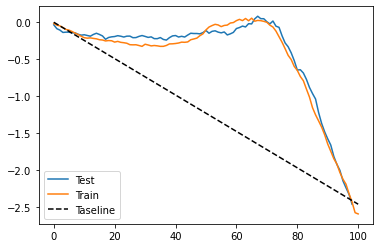

In [12]:
gain_curve_test = cumulative_gain(test.assign(cate=cate_test_transf_y),
                                "cate", y="sales", t="price")

gain_curve_train = cumulative_gain(train.assign(cate=cate_learner.predict(train[["temp", "weekday", "cost"]])),
                                   "cate", y="sales", t="price")


plt.plot(gain_curve_test, label="Test")
plt.plot(gain_curve_train, label="Train")
plt.plot([0, 100], [0, elast(test, "sales", "price")], linestyle="--", color="black", label="Taseline")
plt.legend();

이 데이터의 경우, 타겟 변환을 한 모델이 무작위 모델보다는 훨씬 나은 것으로 보입니다. 그 뿐만 아니라 training set의 결과와 test set의 결과가 매우 비슷합니다. 분산이 문제가 되지 않는다는 뜻이죠. 하지만 이것은 이 데이터셋의 특징일 뿐입니다. 기억하시겠지만, 이진 처치 사례에서는 모델의 성능이 그다지 좋지 않았습니다. 
 
### Non Linear Treatment Effects
 
지금까지 연속적인 처치 사례를 다뤘습니다. 하지만 여전히 해결해야 할 문제가 남아 있습니다. 우리는 처치 효과에 선형성을 가정했습니다. 그러나 이렇게 가정할 수 있는 경우는 매우 드뭅니다. 보통 처치 효과는 어떤 수준에 다다르면 포화 상태에 도달합니다. 우리의 예시에서, 처음 가격을 올렸을 때는 수요가 더 빨리 감소하지만 갈 수록 더 느리게 감소할 것이라고 생각하는 것이 합리적입니다.
 
![img](./data/img/plug-and-play-estimators/non-linear-case.png)

문제는 **처치에 따라 탄력성 또는 처치 효과가 달라진다는 것**입니다. 위 예시에서 처치 효과는 곡선의 시작 부분에 더 강하고 가격이 높아질수록 작아집니다. 다시 한 번, 더운 날(노란색)과 추운 날(파란색)의 두 가지 유형이 있고 인과 모델을 사용하여 이 둘을 구분하고 싶다고 가정해 보겠습니다. 그런데 인과 모델은 탄력성을 예측해야 하지만, 비선형적인 경우 서로 다른 지점을 비교하면 더운 날과 추운 날의 탄력성이 동일할 수 있습니다(오른쪽 이미지).
 
이 문제에서 쉽게 벗어날 수 있는 방법은 없습니다. 저 역시 가장 효과적인 방법을 계속 연구 중입니다. 현재 생각 중인 방식은 처치 효과가 어떤 함수를 따르는지 생각하고 그걸 선형으로 바꾸는 것입니다. 예를 들어, 수요는 일반적으로 다음과 같은 함수 형태를 가집니다. $\alpha$가 높으면 가격이 인상될 때마다 수요가 더 빨리 감소하죠.
 
$
D_i = \dfrac{1}{P_i^{\alpha}}
$

만약 수요 $Y$와 가격 $T$에 로그 변환을 씌운다면, 선형 함수가 나올 겁니다.

$
\begin{align}
log(D)_i &= log\bigg(\dfrac{1}{P_i^{\alpha}}\bigg) \\
&= log(1) - log(P_i^{\alpha}) \\
&= log(1) - log(P_i^{\alpha}) \\
&= - \alpha * log(P_i) \\
\end{align}
$

함수를 선형으로 바꾸는 것은 쉬운 일이 아닙니다. 약간의 고민이 필요하죠. 여러분도 몇 가지를 시도해보고 무엇이 가장 효과적인지 확인해보세요. 로그와 제곱근 같은 것이 도움이 되는 경우가 많습니다.
 
## Key Ideas

우리는 머신러닝 모델을 사용하여 CATE를 추정하는 방향으로 나아가고 있습니다. 이 때 가장 큰 문제는 인과 효과를 추정할 수 있도록 예측 모델을 설계하는 것입니다. 보통의 예측 모델은 결과 Y를 피처 X와 처치 T의 함수 $Y = M(X, T)$로 추정하는데, 인과 모델에서는 이 결과 함수의 처치에 대한 편미분 $\partial Y = \partial M(X, T)$를 추정해야 하기 때문입니다. 이는 간단한 일이 아닙니다. 결과 Y는 관찰할 수 있지만, 개별적인 $\partial Y$를 관찰할 수 없으니까요. 따라서 약간의 창의력을 발휘해 모델의 목적 함수를 설계해야 합니다. 

여기에서는 타겟 변환이라는 아주 간단한 기법을 살펴봤습니다. 우리의 아이디어는 원래 타겟 Y와 처치 T를 결합하여 새로운 타겟을 만드는 것입니다. 그리고 그 변환된 타겟의 기댓값은 CATE와 동일합니다. 이 새로운 타겟을 사용하여 예측 ML 모델을 추정하면 모델의 예측값이 CATE의 추정치가 될 것입니다. 참고로 이 타겟 변환 방법을 **F-Learner**라고 부르기도 합니다. 
 
정말 간단한 방법이지만, 그에 대가가 따르기도 합니다. 변환된 타겟은 개별 처치 효과에 대한 노이즈가 매우 많은 추정치입니다. 이러한 노이즈는 모델 추정치의 분산으로 나타납니다. 따라서 타겟 변환은 표본 크기가 커서, 분산이 문제가 되지 않는 빅데이터 사례에 더 적합합니다. 타겟 변환 방법의 또 다른 단점은 이진 또는 범주형 처치에 대해서만 정의할 수 있다는 것입니다. 우리는 연속적인 처치에서도 타겟 변환을 적용할 방법을 찾기 위해 최선을 다했고, 결국 효과가 있는 듯한 접근법을 만들어냈습니다. 하지만 아직은 이를 뒷받침할 확실한 이론적 토대가 없습니다. 
 
마지막으로, 우리는 처치 효과가 비선형적인 경우 어떤 문제가 생기는지를 보았습니다. 즉, 처치 자체에 따라 처치 효과가 달라지는 경우, 처치 반응 곡선의 서로 다른 지점을 보고 탄력성이 동일하다고 착각할 수 있습니다.


## References 

제가 여기에 쓴 글은 대부분 제 머릿속에서 나온 내용입니다. 이 파트의 내용은 경험적으로 습득했습니다. 즉, 훌륭한 과학이 거쳐야 하는 학문적 엄밀성을 통과하지 **못했다**는 뜻입니다. 이 챕터에서 저는 실제로 효과가 있는 방법들을 소개했지만, 왜 효과가 있는지를 설명하는 부분은 많지 않았습니다. 일종의 노하우라고 할 수 있습니다. 저는 이 내용을 공개적으로 검토하기 위해 이 글을 올리는 것이니 터무니없는 내용이 있으면 문제를 제기해주세요. 최선을 다해 해결해 드리겠습니다.
 
이 장의 대부분은 Susan Atheys와 Guido W. Imbens의 논문인 *Machine Learning Methods for Estimating Heterogeneous Causal Effects*에서 아이디어를 따왔습니다. 타겟 변환에 대한 자료는 Pierre Gutierrez와 Jean-Yves G´erardy의 논문인 *Causal Inference and Uplift Modeling: A review of the literature*에서 확인할 수 있습니다. 단, 이 논문은 이진 처치 사례만을 다루고 있습니다. K¨unzel et al, 2019의 논문 *Meta-learners for Estimating Heterogeneous Treatment Effects using Machine Learning*는 CATE를 추정하기 위한 인과 모델들을 리뷰하고 있으며, F-learner를 언급하고 있습니다. 
 
## Contribute

Causal Inference for the Brave and True는 인과추론, 통계학에 대한 오픈소스 자료입니다. 이 자료는 금전적으로나 모든 분들이 쉽게 접근하실 수 있도록 하는 것이 목표입니다. 또한, 이 책은 Python 기반의 무료 소프트웨어만 사용해요.
여러분들께서 이 자료가 가치 있다고 생각하시고, 금전적으로 지원을 원하신다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)를 방문해주세요. 
만약 여러분이 금전적으로 기여하기가 쉽지 않으시다면, 오타 수정, 수정 제안, 이해하기 난해한 부분에 대한 피드백 제공 등을 통해 도움을 주실 수 있어요. 이 책의 Github 저장소 [이슈 페이지](https://github.com/CausalInferenceLab/Causal-Inference-with-Python/issues)를 방문해주세요. 마지막으로 이 자료가 여러분의 마음에 드셨다면 도움이 될 수 있는 다른 사람들과 공유해주시고, [한국어 번역 자료](https://github.com/CausalInferenceLab/Causal-Inference-with-Python/stargazers)와 [해당 번역본의 원서](https://github.com/matheusfacure/python-causality-handbook/stargazers)에 star 부탁드립니다!